# Kaggle Competition: Facial Expression Recognition

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

## Data Exploration

### Overview of Dataset

In [151]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

data = pd.read_csv("fer2013.csv")
display(data.head(n=10))

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [172]:
print ("\033[1mThe total number of rows in dataset\033[0m\n")
print (data.count())
print ("\n\033[1mAll the keywords with their starting index in 'Usage' column\033[0m")
print (data.drop_duplicates('Usage')['Usage'])

The total number of rows in dataset

emotion    35887
pixels     35887
Usage      35887
dtype: int64

All the keywords with their starting index in 'Usage' column
0           Training
28709     PublicTest
32298    PrivateTest
Name: Usage, dtype: object


### Dataset Classification

In [174]:
ix = 0
for i in range(1,7):    # divide and save training data into 6 batches
    if ix >= 24999:
        data.loc[ix:28708].to_csv("training_batch_"+str(i)+".csv")
        print ("File 'training_batch_"+str(i)+".csv' saved successfully")
    data.loc[ix:ix+4999].to_csv("training_batch_"+str(i)+".csv")
    print ("File 'training_batch_"+str(i)+".csv' saved successfully")
    ix += 5000

data.loc[28709:32297].to_csv("public_test.csv")    # save public testing data
print ("File 'public_test.csv' saved successfully")

data.loc[32298:].to_csv("private_test.csv")    # save private testing data
print ("File 'private_test.csv' saved successfully")

File 'training_batch_1.csv' saved successfully
File 'training_batch_2.csv' saved successfully
File 'training_batch_3.csv' saved successfully
File 'training_batch_4.csv' saved successfully
File 'training_batch_5.csv' saved successfully
File 'training_batch_6.csv' saved successfully
File 'training_batch_6.csv' saved successfully
File 'public_test.csv' saved successfully
File 'private_test.csv' saved successfully


### Sample Image

Image Info

Batch: 3 
Example of image 111 with shape of: (48, 48)
Emotion ID: 3

Pixel Info

First 18 pixels: [107, 107, 105, 104, 104, 86, 52, 66, 143, 161, 157, 153, 150, 149, 151, 156, 157, 158] 
Max value of pixels: 213 
MIn value of pixels: 0


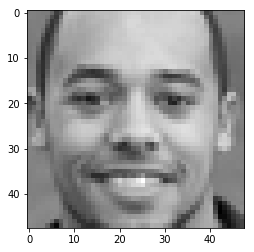

In [170]:
batch_num = 3     # the batch number (tunable)
eximg_ix = 111    # the index of sample image to be displayed (tunable), max # 5000

tmp_data = pd.read_csv("training_batch_"+str(batch_num)+".csv")
image = tmp_data.loc[eximg_ix]['pixels'].split()
img = list(map(int, image))
image = np.array(img).reshape((48,48))

print ("\033[1mImage Info\033[0m\n")
print ("Batch:", batch_num, "\nExample of image", eximg_ix, "with shape of:", image.shape)
print ("Emotion ID:", tmp_data.loc[eximg_ix]['emotion'])
print ("\n\033[1mPixel Info\033[0m\n")
print ("First 18 pixels:", img[:18], "\nMax value of pixels:", max(img), "\nMIn value of pixels:", min(img))
plt.imshow(image, cmap='gray')
plt.show()